# AP Statistics Final Project
**Neural Network for Predicting Airfoil Self-Nosie**

The [data](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise) from this project is a Kaggle mirror of a NASA dataset from the open source UC Irvine Machine Learning Repository.

More details about data features and the data set itself can be found at the link above, or in my presentation.

The objective of this model is the sound pressure level of the airfoil, measured in decibels (dB). 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-airfoil-self-noise/NASA_airfoil_self_noise.csv


Reading the input data.

In [2]:
input_data = pd.read_csv("/kaggle/input/nasa-airfoil-self-noise/NASA_airfoil_self_noise.csv")

The following is a statistical summary of each variable, incuding the objective (sound). Listed for each variable is the five-number summary, the sample size (n), the mean, and the standard deviation.

In [3]:
input_data.describe()

,Frequency,AngleAttack,ChordLength,FreeStreamVelocity,SuctionSide,Sound
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


The following is a correlation table showing the value of *r*, the correlation coefficient, for linear regressions using each combination of variables. 

In [4]:
input_data.corr()

,Frequency,AngleAttack,ChordLength,FreeStreamVelocity,SuctionSide,Sound
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
AngleAttack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
ChordLength,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
FreeStreamVelocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
SuctionSide,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Sound,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


The following six graphs are histograms of the five feature variables, and the single output variable.

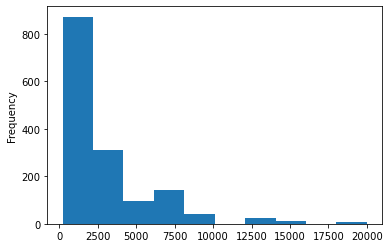

In [5]:
input_data["Frequency"].plot(kind="hist")

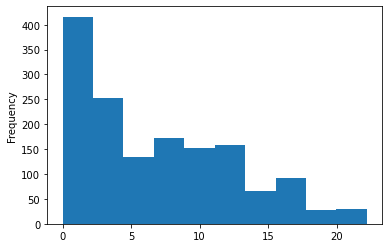

In [6]:
input_data["AngleAttack"].plot(kind="hist")

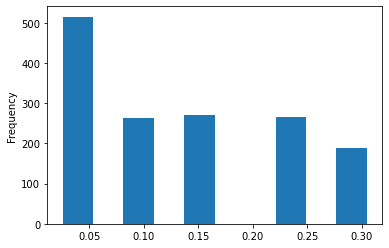

In [7]:
input_data["ChordLength"].plot(kind="hist")

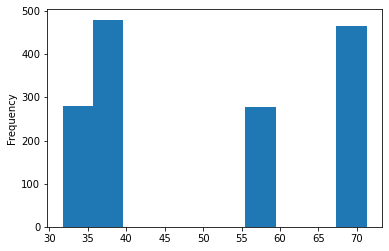

In [8]:
input_data["FreeStreamVelocity"].plot(kind="hist")

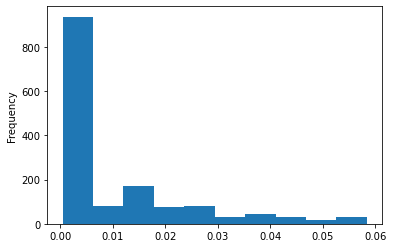

In [9]:
input_data["SuctionSide"].plot(kind="hist")

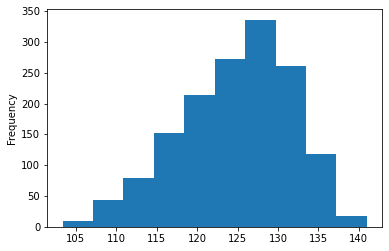

In [10]:
input_data["Sound"].plot(kind="hist")

Splitting data into features and objective.

In [11]:
y = input_data["Sound"]
X = input_data.drop("Sound", axis=1)

Creating a train/test split of 80/20.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Constructing the actual model layer by layer. The "relu" activation function is used for all Dense layers except the last one, where a linear one is used.

In [13]:
import keras
from keras.layers import *
model = keras.models.Sequential()
model.add(Dense(128, input_dim = 5, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="linear"))

Using TensorFlow backend.


Compiling the model.

In [14]:
from keras import metrics
model.compile(optimizer="adam", loss = "mean_squared_error", metrics=[metrics.MeanSquaredError()])

Fitting the model to the training data.

In [15]:
model.fit(X_train, y_train, batch_size = 64, epochs = 5000, verbose = 0)

Summary of the model.

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

Calculating the loss of the model on the test set (in this case, it is mean squared error).

In [17]:
loss = model.evaluate(X_test, y_test, verbose=1)

301/301 [==============================] - 0s 178us/step


In [18]:
print("Mean Squared Error:", loss)
print("Root Mean Squared Error:", np.sqrt(loss))

Mean Squared Error: [3.648770113720054, 3.6487700939178467]
Root Mean Squared Error: [1.91017541 1.91017541]


In [19]:
y_pred = model.predict(X_test)

Creating a residual plot of predicted vs actual values to see if it appropriate to calculate the correlation coefficient *r*.

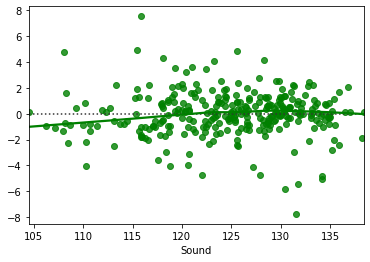

In [20]:
import numpy as np
import seaborn as sns
sns.residplot(y_test, y_pred, lowess=True, color="g")


A scatterplot of our predictions vs the actual values for the test set.

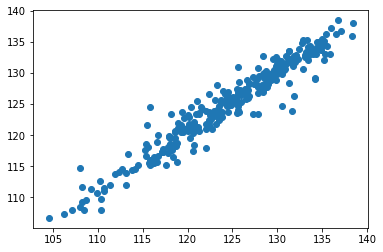

In [21]:
from matplotlib import pyplot
pyplot.scatter(y_test, y_pred)

Changing the dimensionality of our predictions to match the input data so we can calculate the correlation coefficient.

In [22]:
y_pred_1 = y_pred.flatten()

Calculating the value of the correlation coefficient *r* between our predictions on the test set and the actual values.

In [23]:
import numpy as np
import scipy.stats
corr , _ = scipy.stats.pearsonr(y_test, y_pred_1)
print("Pearsons correlation:", corr)

Pearsons correlation: 0.9658372000504387


Calculating *r^2*

In [24]:
r2 = np.power(corr,2)
print(r2)

0.9328414970012712


Linear Regression of Observed vs Predicted.

In [28]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std = stats.linregress(y_test,y_pred_1)
print(slope, intercept)

0.9221580686326721 10.232067875115604
